# Problem Set 1 (Take Home) - 40 points

## PS 1.A - 20 points

In [this video](https://www.youtube.com/watch?v=ho6JXE3EbZ8) the author explains how to extract various visualizations of what CNNs learn. [Your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/cnn/cnn-example-architectures/visualizing-what-convnets-learn.html) also covers the topic. 

Using the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), train a ResNet-50 based CNN on the classification task of $K=9$ classes (filter out the class `ship`) and create the following visualizations for first, middle and last blocks of ResNet-50. You are free to select a class to showcase such visualizations.

* Visualizing intermediate convnet outputs (“intermediate activations”). This is useful to understand how successive convnet layers transform their input.

* Visualizing convnets filters. This is useful to understand precisely what visual pattern or concept each filter in a convnet is receptive to.

* Visualizing heatmaps of class activation in an image. This is useful to understand which part of an image where identified as belonging to a given class, and thus allows to localize objects in images.


In [2]:
# Insert your code here
# Insert your code here
#importing the neccesary libraries
import numpy as np
import matplotlib as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers , Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical


#Loading the cifar10 dataset
(xtrain , ytrain) , (xtest , ytest) = cifar10.load_data()

#excluding ship class[8]
updatedClass = [0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 9]

#updating xtrain,ytrain and xtest, ytest according to the updated classes
xtrainUpdated , ytrainUpdated = [] , []
xtestUpdated , ytestUpdated = [] , []

for i in range(len(ytrain)):
    if ytrain[i][0] in updatedClass:
        xtrainUpdated.append(xtrain[i])
        ytrainUpdated.append(updatedClass.index(ytrain[i][0]))

for i in range(len(ytest)):
    if ytest[i][0] in updatedClass:
        xtestUpdated.append(xtest[i])
        ytestUpdated.append(updatedClass.index(ytest[i][0]))

#we have now updated our training and testing classes by excluding the "ship" class
ytrainUpdated = to_categorical(ytrainUpdated, num_classes=9)
ytestUpdated = to_categorical(ytestUpdated, num_classes=9)

#Converting the classes to Numpy arrays
xtrainUpdated = np.array(xtrainUpdated)
ytrainUpdated = np.array(ytrainUpdated)
xtestUpdated = np.array(xtestUpdated)
ytestUpdated = np.array(ytestUpdated)

#resizing xtrainUpdated and xtestUpdated
#xtrainUpdatedSize = tf.image.resize(xtrainUpdated , (224,224))
#xtestUpdatedSize = tf.image.resize(xtestUpdated , (224,224))

#BUILDING THE RESNET-50 MODEL:

Rnm = ResNet50(include_top = False , weights = 'imagenet' , input_tensor=None , input_shape = (32 , 32 , 3))

#Freezing the pre-trained layers to not loose the data
for layer in Rnm.layers:
    layer.trainable = False

#Modifying the output layer
x = layers.GlobalAveragePooling2D()(Rnm.output)
preds = layers.Dense(9 , activation = 'softmax')(x)

ourModel = Model(inputs = Rnm.input , outputs = preds)

#Compiling the model
ourModel.compile(optimizer = RMSprop(learning_rate = 1e-4) , loss = 'categorical_crossentropy' , metrics = ['acc'])

ourModel.fit(xtrainUpdated, ytrainUpdated , validation_data = (xtestUpdated , ytestUpdated)  , epochs = 5 , batch_size = 64)

ourModel.summary()


94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/5
704/704 [==============================] - 109s 151ms/step - loss: 1.9873 - acc: 0.4053 - val_loss: 1.5456 - val_acc: 0.4944
Epoch 2/5
704/704 [==============================] - 104s 148ms/step - loss: 1.4201 - acc: 0.5300 - val_loss: 1.3556 - val_acc: 0.5464
Epoch 3/5
704/704 [==============================] - 111s 158ms/step - loss: 1.2841 - acc: 0.5680 - val_loss: 1.2921 - val_acc: 0.5627
Epoch 4/5
704/704 [==============================] - 96s 136ms/step - loss: 1.2053 - acc: 0.5902 - val_loss: 1.2451 - val_acc: 0.5809
Epoch 5/5
704/704 [==============================] - 93s 132ms/step - loss: 1.1531 - acc: 0.6075 - val_loss: 1.2070 - val_acc: 0.5892
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)] 

1/1 [==============================] - 0s 74ms/step
64


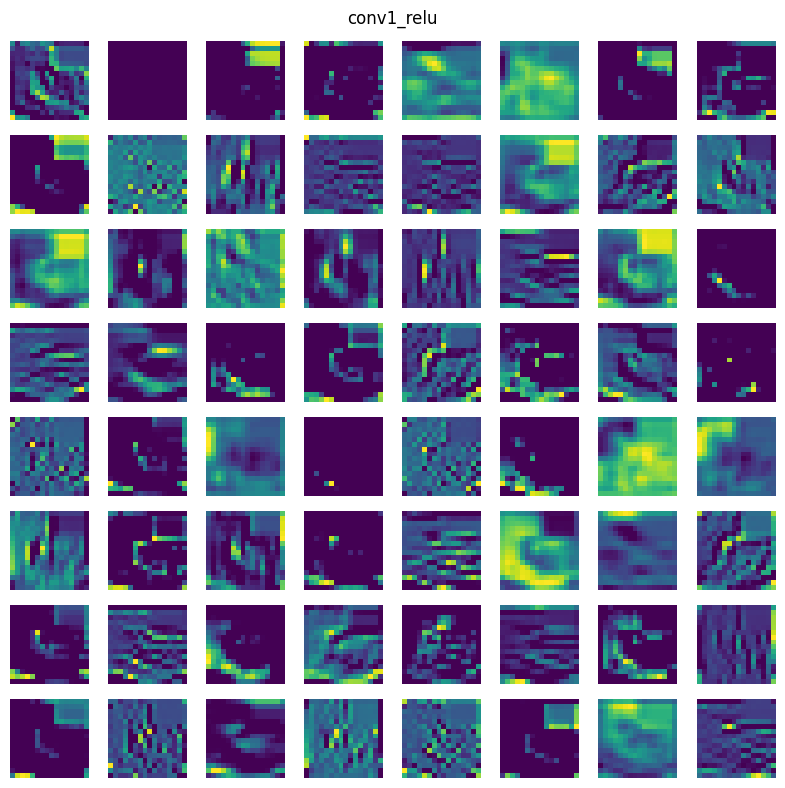

1/1 [==============================] - 0s 461ms/step
512


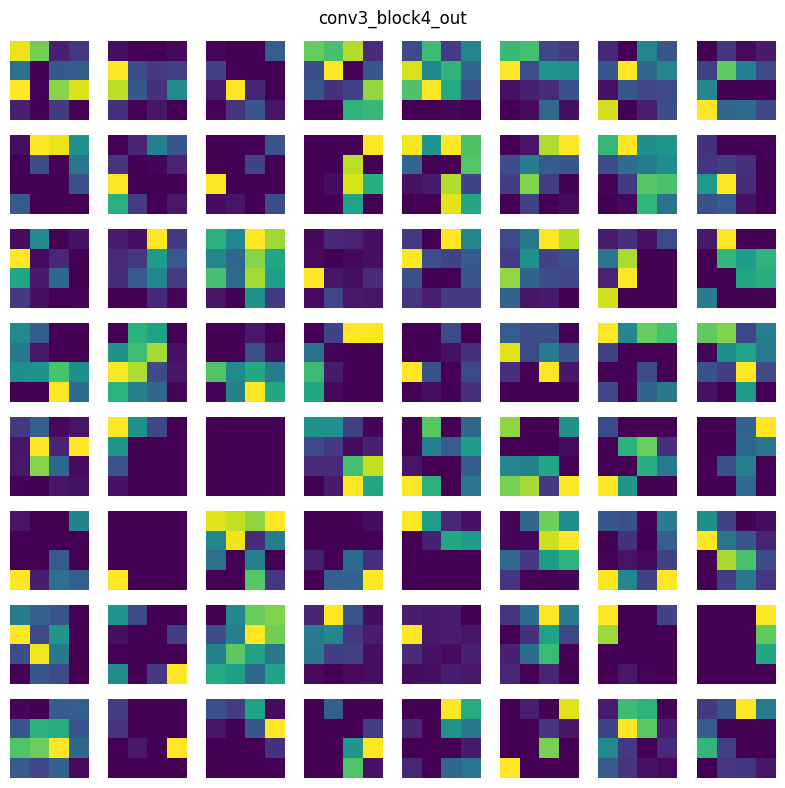

1/1 [==============================] - 1s 798ms/step
2048


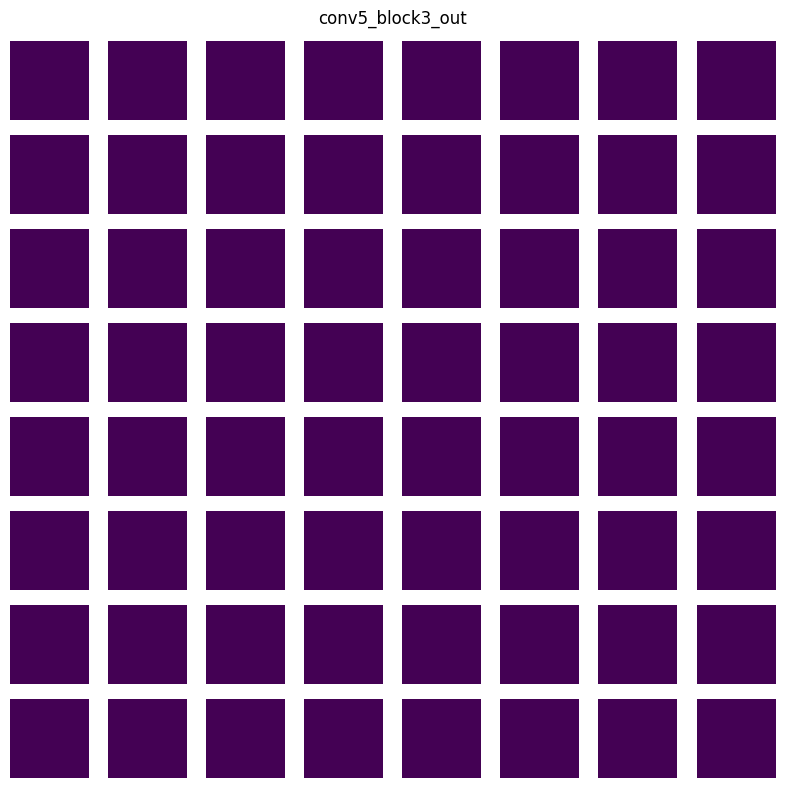

In [3]:
#VISUALIZING INTERMEDIATE CONVNET OUTPUT
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Choose a random image from the dataset
sample_image = xtrain[np.random.randint(0, xtrain.shape[0])]

# Preprocess the image for ResNet-50
sample_image = preprocess_input(sample_image)
sample_image = np.expand_dims(sample_image, axis=0)

sample_Image = sample_image.reshape(1 , 32 , 32 , 3)

# Choose layers from the first, middle, and last blocks
layer_names = ['conv1_relu', 'conv3_block4_out', 'conv5_block3_out']


# Generate and visualize intermediate activations
for layer_name in layer_names:
    activation_model = Model(inputs=ourModel.input, outputs=ourModel.get_layer(layer_name).output)
    intermediate_activations = activation_model.predict(sample_Image)
    num_filters = intermediate_activations.shape[-1]
    print(num_filters)

    fig, axes = plt.subplots(8, 8, figsize=(8, 8))
    for i in range(num_filters):
        if i < 8 * 8:
            ax = axes[i // 8, i % 8]
            ax.matshow(intermediate_activations[0, :, :, i], cmap='viridis')
            ax.axis('off')
    plt.suptitle(layer_name)
    plt.tight_layout()
    plt.show()

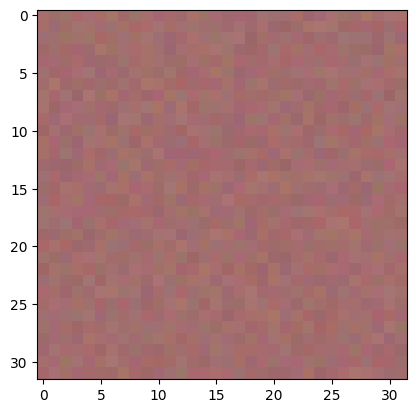

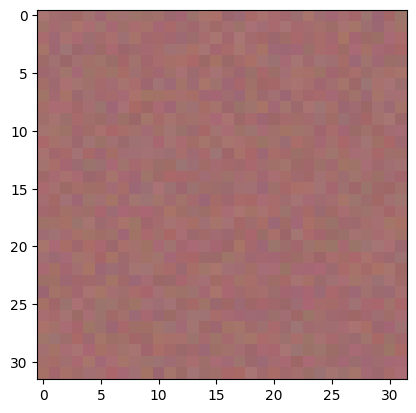

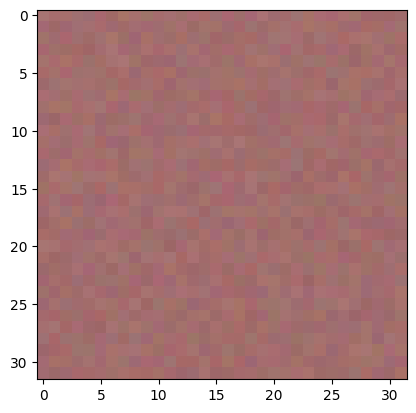

In [4]:
#VISUALIZING THE CONVNET FILTERS:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    x += 0.5
    x = np.clip(x , 0 , 1)

    return x


# Define a function to generate patterns for specific layers
def generate_pattern(layer_name, filter_index, size=32):
    input_img_data = tf.Variable(np.random.random((1 , 32 , 32 , 3)) * 20+128.)
    # Compute gradients of the loss with respect to the model's input
    with tf.GradientTape() as tape:
        tape.watch(input_img_data)
        layer_output = ourModel.get_layer(layer_name)(input_img_data)
        loss = tf.reduce_mean(layer_output[ : , : , : , filter_index])

    grads = tape.gradient(loss, input_img_data)

    # Normalize the gradients
    grads /= (tf.math.sqrt(tf.math.reduce_mean(tf.math.square(grads))) + 1e-5)
    step = 1.
    for i in range(40):
        input_img_data.assign_add(grads*step)

    img = input_img_data.numpy()[0]
    return deprocess_image(img)

plt.imshow(generate_pattern('conv1_relu' , 0))
plt.axis()
plt.show()


plt.imshow(generate_pattern('conv3_block4_out' , 0))
plt.axis()
plt.show()


plt.imshow(generate_pattern('conv5_block3_out' , 0))
plt.axis()
plt.show()

1/1 [==============================] - 1s 801ms/step


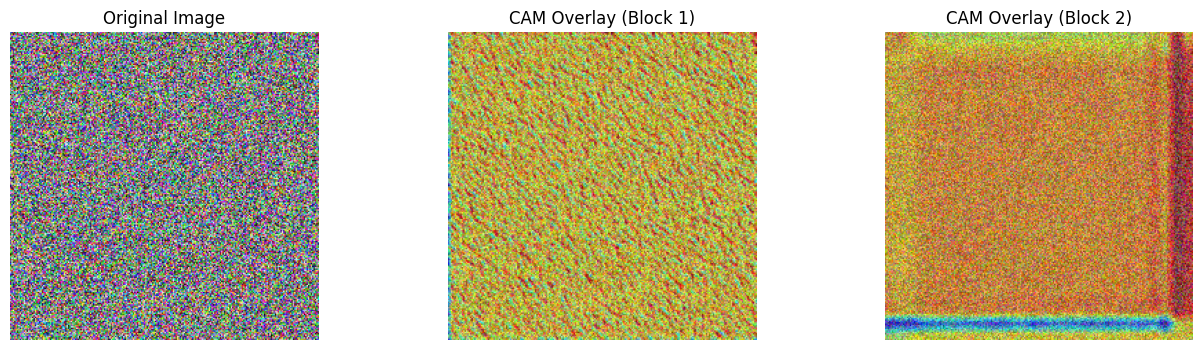

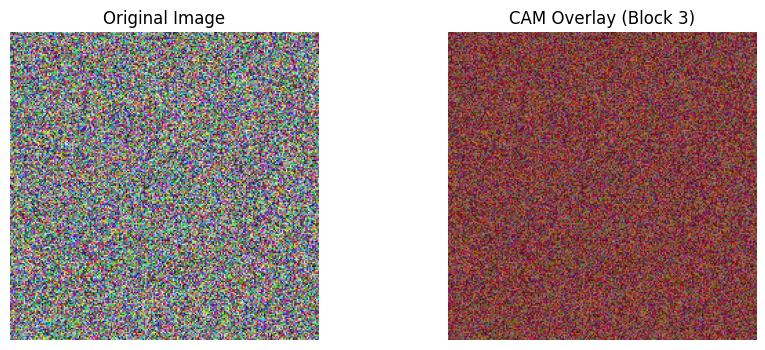

In [37]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Load ResNet-50 model with pre-trained weights (include_top=False to exclude final classification layer)
#ourModel = ResNet50(weights='imagenet', include_top=False)

# Access a specific layer by name
desired_layer1 = ourModel.get_layer('conv1_relu')
desired_layer2 = ourModel.get_layer('conv3_block4_out')
desired_layer3 = ourModel.get_layer('conv5_block3_out')

# Create a sub-model that outputs the feature maps of the desired layer
sub_model1 = Model(inputs=ourModel.input, outputs=desired_layer1.output)
sub_model2 = Model(inputs=ourModel.input, outputs=desired_layer2.output)
sub_model3 = Model(inputs=ourModel.input, outputs=desired_layer3.output)

# Define a placeholder tensor of the appropriate size
placeholder_img = np.random.random((1, 224, 224, 3))

# Generate class activation maps (CAM) for the desired layers
activation_map1 = sub_model1.predict(placeholder_img)
activation_map1_resized = cv2.resize(activation_map1[0, :, :, 0], (224, 224))

activation_map2 = sub_model2.predict(placeholder_img)
activation_map2_resized = cv2.resize(activation_map2[0, :, :, 0], (224, 224))

activation_map3 = sub_model3.predict(placeholder_img)
activation_map3_resized = cv2.resize(activation_map3[0, :, :, 0], (224, 224))

# Function to overlay CAM on the original image
def overlay_cam(image, activation_map, alpha=0.5, cmap='jet'):
    # Resize the CAM to match the original image size
    activation_map = cv2.resize(activation_map, (image.shape[1], image.shape[0]))

    # Normalize the CAM to be between 0 and 1
    activation_map = (activation_map - activation_map.min()) / (activation_map.max() - activation_map.min() + 1e-5)

    # Apply a colormap for visualization
    activation_map = (255 * activation_map).astype(np.uint8)
    heatmap = cv2.applyColorMap(activation_map, cv2.COLORMAP_JET)

    # Overlay the heatmap on the original image
    cam_overlay = cv2.addWeighted(image, 1 - alpha, heatmap, alpha, 0)

    return cam_overlay

# Overlay CAM on the original image
original_image = placeholder_img[0] * 255  # Assuming input images are in the range [0, 255]
cam_overlay1 = overlay_cam(original_image.astype(np.uint8), activation_map1_resized, alpha=0.5, cmap='jet')
cam_overlay2 = overlay_cam(original_image.astype(np.uint8), activation_map2_resized, alpha=0.5, cmap='jet')
cam_overlay3 = overlay_cam(original_image.astype(np.uint8), activation_map3_resized, alpha=0.5, cmap='jet')

# Create subplots with two side-by-side images
plt.figure(figsize=(16, 4))
plt.subplot(131)
plt.title("Original Image")
plt.imshow(original_image.astype(np.uint8))
plt.axis('off')
plt.subplot(132)
plt.title("CAM Overlay (Block 1)")
plt.imshow(cam_overlay1)
plt.axis('off')
plt.subplot(133)
plt.title("CAM Overlay (Block 2)")
plt.imshow(cam_overlay2)
plt.axis('off')
plt.show()

# Create subplots with two side-by-side images
plt.figure(figsize=(16, 4))
plt.subplot(131)
plt.title("Original Image")
plt.imshow(original_image.astype(np.uint8))
plt.axis('off')
plt.subplot(132)
plt.title("CAM Overlay (Block 3)")
plt.imshow(cam_overlay3)
plt.axis('off')
plt.show()


## PS 1.B - 20 points

In [this notebook](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/transfer-learning/transfer_learning_tutorial.html) we showcase _transfer learning_ using a pre-trained CNN model. 

Perform the fine-tunning and feature extraction methods of transfer learning using the same model as in PS-1A, for the class `ship`. 

Repeat the visualization of PS-1.A before and after  transfer learning and write a conclusive summary as to the relative value of the two methods.

In [17]:
# Insert your code here
#Creating a subset of the original data, the subset is for class 8 only
xtrainShip = xtrain[ytrain[:, 0] == 8]
ytrainShip = ytrain[ytrain[:, 0] == 8]
xtestShip = xtest[ytest[:, 0] == 8]
ytestShip = ytest[ytest[:, 0] == 8]

#Preprocessing the data
xtrainShip = tf.image.resize(xtrainShip, (32 , 32))
xtestShip = tf.image.resize(xtestShip, (32 , 32))
xtrainShip = xtrainShip / 255.0  # Normalize pixel values
xtestShip = xtestShip / 255.0

#FINE TUNING
# Modifying the output layer for fine-tuning
x = layers.GlobalAveragePooling2D()(Rnm.output)
preds = layers.Dense(1, activation='sigmoid')(x)  # For binary classification (ship vs. non-ship)

finelytunedModel = Model(inputs=Rnm.input, outputs=preds)

# Compiling the fine-tuning model
finelytunedModel.compile(optimizer=RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model using xtrain_ship and ytrain_ship
finelytunedModel.fit(xtrainShip, ytrainShip, epochs=5, batch_size=32)



Epoch 1/5
157/157 [==============================] - 13s 64ms/step - loss: -57.8197 - accuracy: 0.0000e+00
Epoch 2/5
157/157 [==============================] - 10s 64ms/step - loss: -122.5076 - accuracy: 0.0000e+00
Epoch 3/5
157/157 [==============================] - 10s 66ms/step - loss: -187.0817 - accuracy: 0.0000e+00
Epoch 4/5
157/157 [==============================] - 10s 66ms/step - loss: -251.6402 - accuracy: 0.0000e+00
Epoch 5/5
157/157 [==============================] - 10s 66ms/step - loss: -316.1841 - accuracy: 0.0000e+00


In [14]:
#FEATURE EXTRACTION:
featureExtraction_model = Model(inputs=Rnm.input, outputs=x)

# Extract features using xtrain_ship and xtest_ship
train_features_Ship = featureExtraction_model.predict(xtrainShip)
test_features_Ship = featureExtraction_model.predict(xtestShip)


32/32 [==============================] - 2s 66ms/step


1/1 [==============================] - 0s 45ms/step


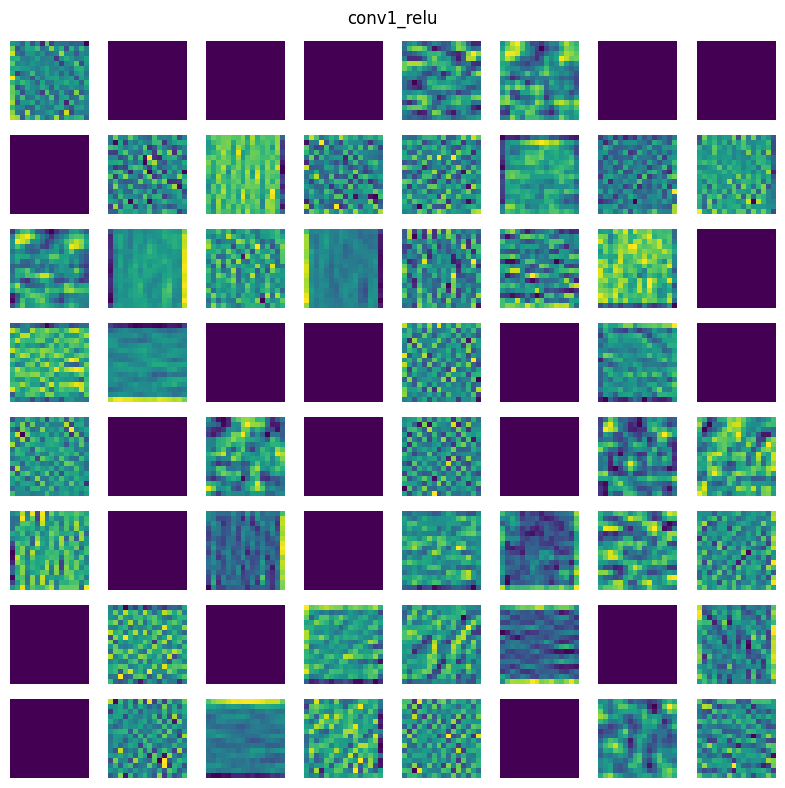

1/1 [==============================] - 0s 362ms/step


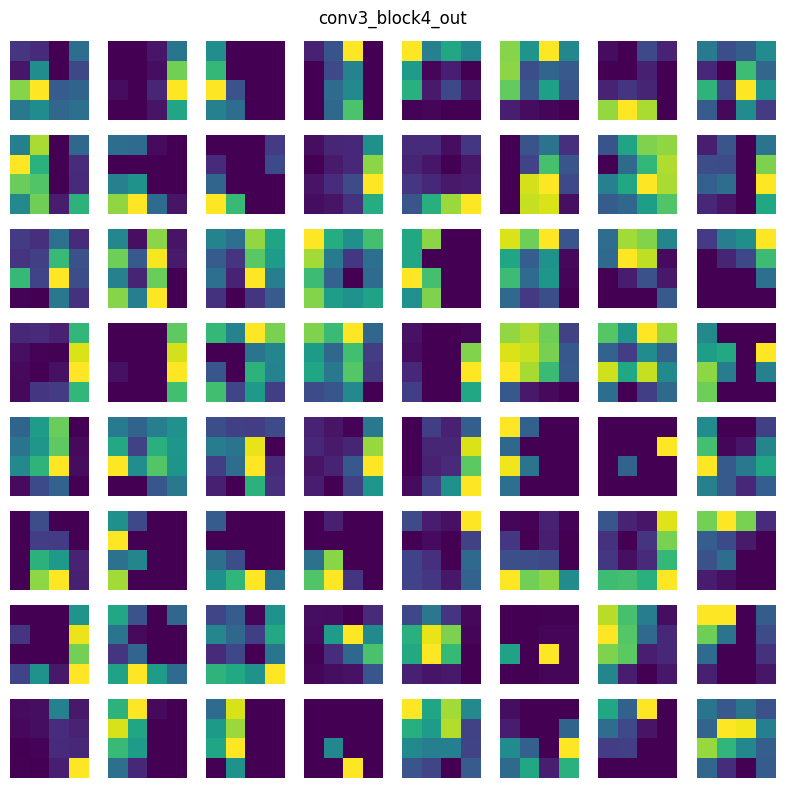

1/1 [==============================] - 1s 721ms/step


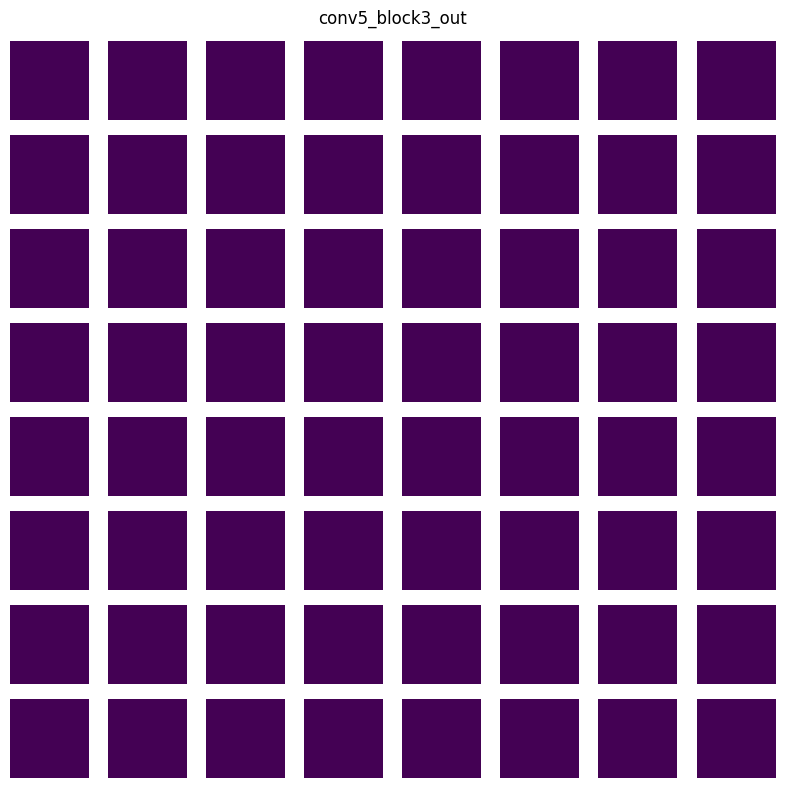

In [35]:
#We need to visualise the ship class : 3 visualisations
#1. Itermediate activation functions:

# Create a sub-model for intermediate activations
sub_model1 = Model(inputs=finelytunedModel.input, outputs=finelytunedModel.get_layer('conv1_relu').output)

# Generate activations for a specific image (replace placeholder_img with your image)
placeholder_img = np.random.random((1, 32, 32, 3))
intermediate_activations = sub_model1.predict(placeholder_img)

# Visualize intermediate activations for a specific layer
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i in range(num_filters):
    if i < 8 * 8:
        ax = axes[i // 8, i % 8]
        ax.matshow(intermediate_activations[0, :, :, i], cmap='viridis')
        ax.axis('off')
plt.suptitle('conv1_relu')
plt.tight_layout()
plt.show()



sub_model2 = Model(inputs=finelytunedModel.input, outputs=finelytunedModel.get_layer('conv3_block4_out').output)

# Generate activations for a specific image (replace placeholder_img with your image)
placeholder_img = np.random.random((1, 32, 32, 3))
intermediate_activations = sub_model2.predict(placeholder_img)

# Visualize intermediate activations for a specific layer
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i in range(num_filters):
    if i < 8 * 8:
        ax = axes[i // 8, i % 8]
        ax.matshow(intermediate_activations[0, :, :, i], cmap='viridis')
        ax.axis('off')
plt.suptitle('conv3_block4_out')
plt.tight_layout()
plt.show()



sub_model3 = Model(inputs=finelytunedModel.input, outputs=finelytunedModel.get_layer('conv5_block3_out').output)

# Generate activations for a specific image (replace placeholder_img with your image)
placeholder_img = np.random.random((1, 32, 32, 3))
intermediate_activations = sub_model3.predict(placeholder_img)

# Visualize intermediate activations for a specific layer
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i in range(num_filters):
    if i < 8 * 8:
        ax = axes[i // 8, i % 8]
        ax.matshow(intermediate_activations[0, :, :, i], cmap='viridis')
        ax.axis('off')
plt.suptitle(layer_name)
plt.tight_layout()
plt.show()


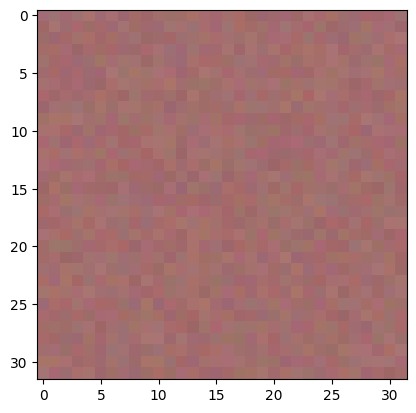

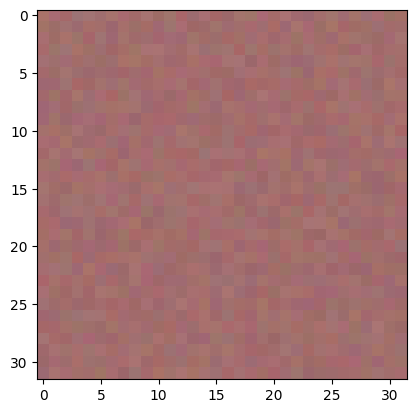

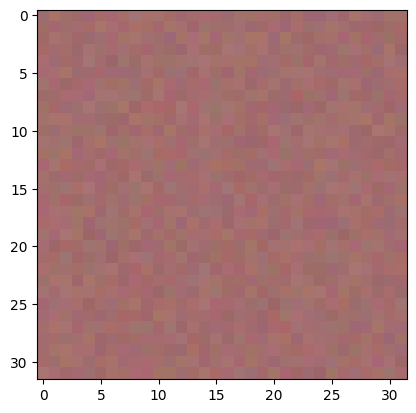

In [36]:
#VISUALIZATION 2: CONVNET FILTERS:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    x += 0.5
    x = np.clip(x , 0 , 1)

    return x


# Define a function to generate patterns for specific layers
def generate_pattern(layer_name, filter_index, size=32):
    input_img_data = tf.Variable(np.random.random((1 , 32 , 32 , 3)) * 20+128.)
    # Compute gradients of the loss with respect to the model's input
    with tf.GradientTape() as tape:
        tape.watch(input_img_data)
        layer_output = finelytunedModel.get_layer(layer_name)(input_img_data)
        loss = tf.reduce_mean(layer_output[ : , : , : , filter_index])

    grads = tape.gradient(loss, input_img_data)

    # Normalize the gradients
    grads /= (tf.math.sqrt(tf.math.reduce_mean(tf.math.square(grads))) + 1e-5)
    step = 1.
    for i in range(40):
        input_img_data.assign_add(grads*step)

    img = input_img_data.numpy()[0]
    return deprocess_image(img)

plt.imshow(generate_pattern('conv1_relu' , 0))
plt.axis()
plt.show()


plt.imshow(generate_pattern('conv3_block4_out' , 0))
plt.axis()
plt.show()


plt.imshow(generate_pattern('conv5_block3_out' , 0))
plt.axis()
plt.show()

1/1 [==============================] - 1s 873ms/step


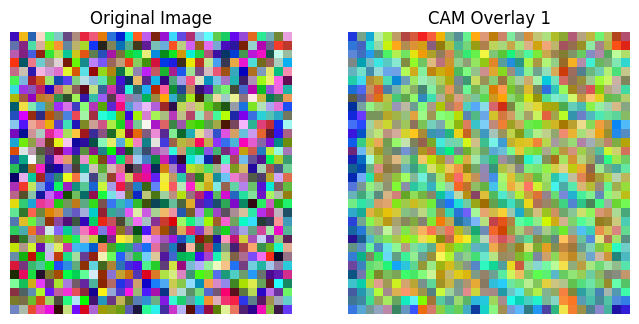

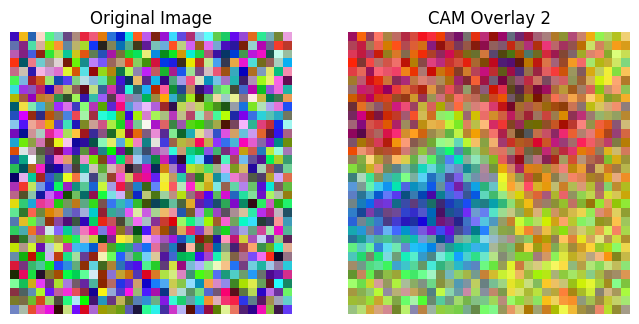

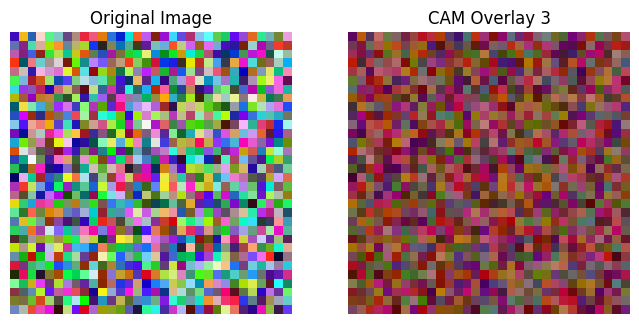

In [41]:
# Access a specific layer by name
desired_layer1 = finelytunedModel.get_layer('conv1_relu')
desired_layer2 = finelytunedModel.get_layer('conv3_block4_out')
desired_layer3 = finelytunedModel.get_layer('conv5_block3_out')

# Create a sub-model that outputs the feature maps of the desired layer
sub_model1 = Model(inputs=finelytunedModel.input, outputs=desired_layer1.output)
sub_model2 = Model(inputs=finelytunedModel.input, outputs=desired_layer2.output)
sub_model3 = Model(inputs=finelytunedModel.input, outputs=desired_layer3.output)

# Define a placeholder tensor of the appropriate size
placeholder_img = np.random.random((1, 32 , 32 , 3))

# Generate class activation maps (CAM) for the desired layers
activation_map1 = sub_model1.predict(placeholder_img)
activation_map1_resized = cv2.resize(activation_map1[0, :, :, 0], (224, 224))

activation_map2 = sub_model2.predict(placeholder_img)
activation_map2_resized = cv2.resize(activation_map2[0, :, :, 0], (224, 224))

activation_map3 = sub_model3.predict(placeholder_img)
activation_map3_resized = cv2.resize(activation_map3[0, :, :, 0], (224, 224))

# Function to overlay CAM on the original image
def overlay_cam(image, activation_map, alpha=0.5, cmap='jet'):
    # Resize the CAM to match the original image size
    activation_map = cv2.resize(activation_map, (image.shape[1], image.shape[0]))

    # Normalize the CAM to be between 0 and 1
    activation_map = (activation_map - activation_map.min()) / (activation_map.max() - activation_map.min() + 1e-5)

    # Apply a colormap for visualization
    activation_map = (255 * activation_map).astype(np.uint8)
    heatmap = cv2.applyColorMap(activation_map, cv2.COLORMAP_JET)

    # Overlay the heatmap on the original image
    cam_overlay = cv2.addWeighted(image, 1 - alpha, heatmap, alpha, 0)

    return cam_overlay


original_image = placeholder_img[0] * 255  # Assuming input images are in the range [0, 255]
cam_overlay1 = overlay_cam(original_image.astype(np.uint8), activation_map1_resized, alpha=0.5, cmap='jet')
cam_overlay2 = overlay_cam(original_image.astype(np.uint8), activation_map2_resized, alpha=0.5, cmap='jet')
cam_overlay3 = overlay_cam(original_image.astype(np.uint8), activation_map3_resized, alpha=0.5, cmap='jet')

# Visualize the CAM overlay
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(original_image.astype(np.uint8))
plt.axis('off')
plt.subplot(122)
plt.title("CAM Overlay 1")
plt.imshow(cam_overlay1)
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(original_image.astype(np.uint8))
plt.axis('off')
plt.subplot(122)
plt.title("CAM Overlay 2")
plt.imshow(cam_overlay2)
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(original_image.astype(np.uint8))
plt.axis('off')
plt.subplot(122)
plt.title("CAM Overlay 3")
plt.imshow(cam_overlay3)
plt.axis('off')
plt.show()



1/1 [==============================] - 0s 82ms/step


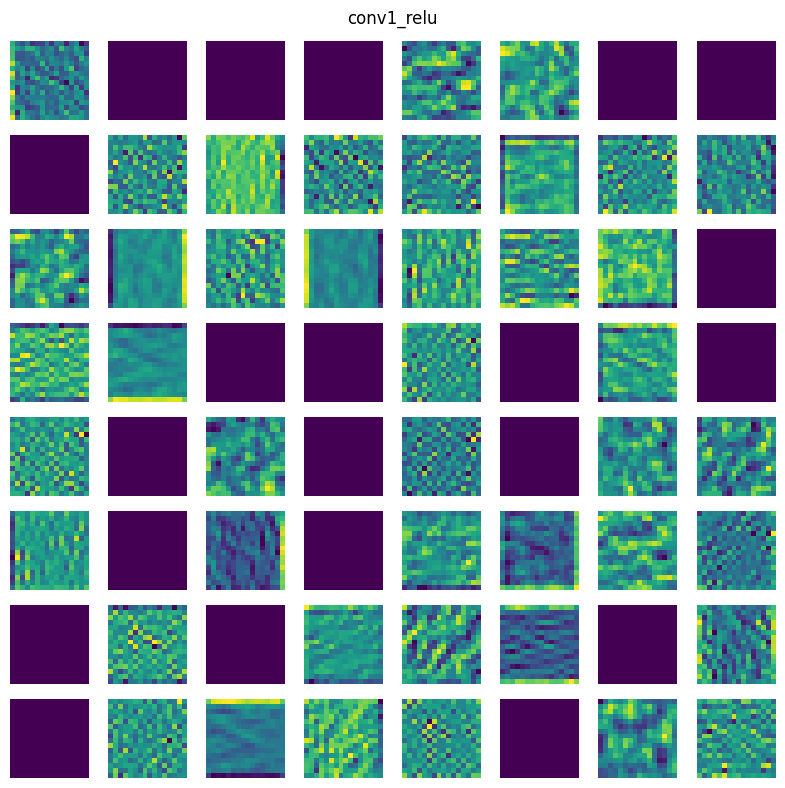

1/1 [==============================] - 0s 349ms/step


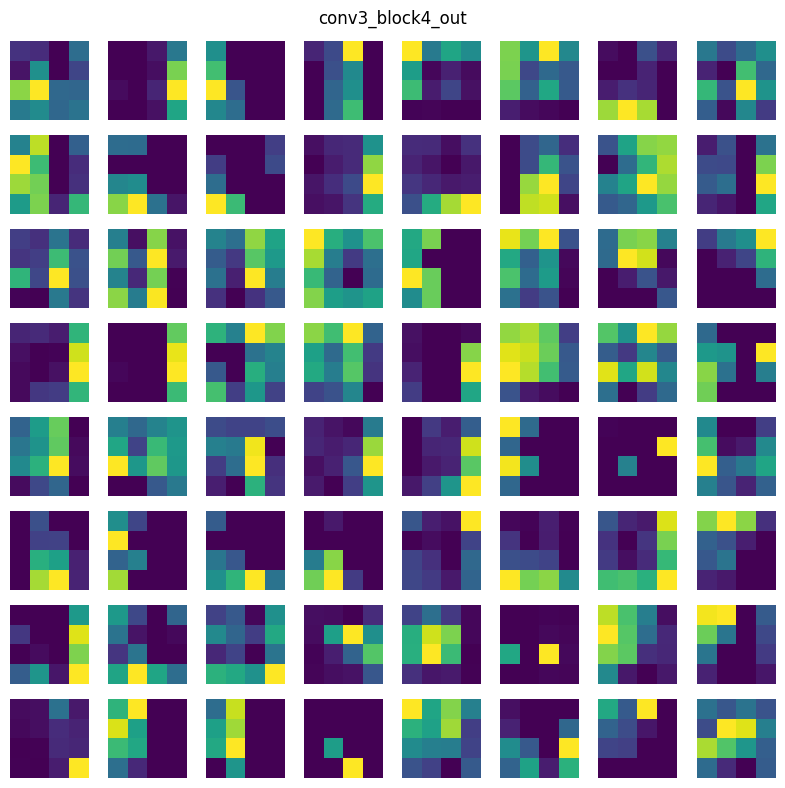

1/1 [==============================] - 1s 813ms/step


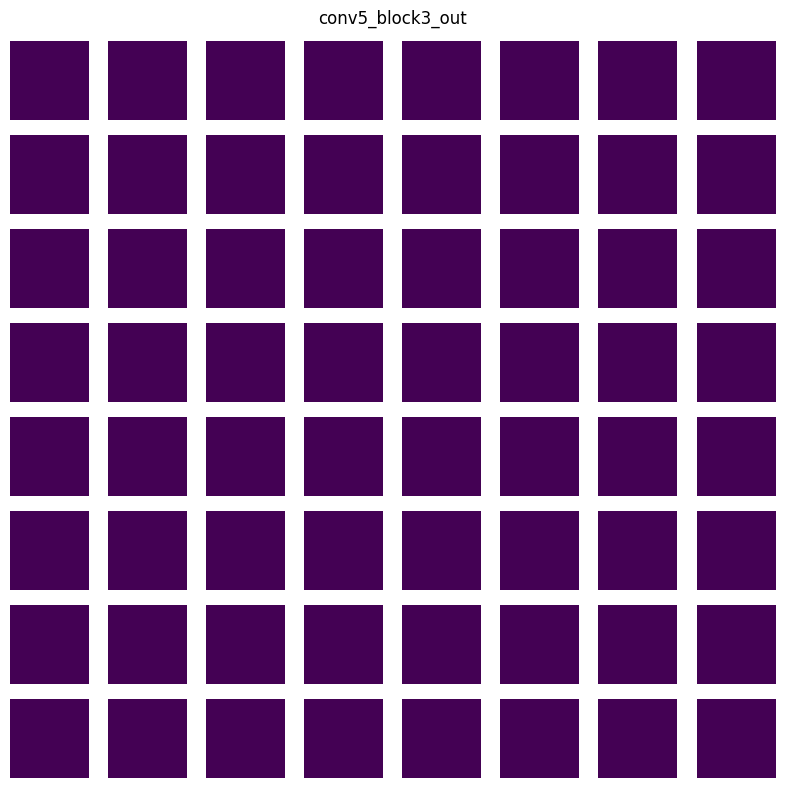

In [42]:
#1. Itermediate activation functions:

# Create a sub-model for intermediate activations
sub_model1 = Model(inputs=featureExtraction_model.input, outputs=featureExtraction_model.get_layer('conv1_relu').output)

# Generate activations for a specific image (replace placeholder_img with your image)
placeholder_img = np.random.random((1, 32, 32, 3))
intermediate_activations = sub_model1.predict(placeholder_img)

# Visualize intermediate activations for a specific layer
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i in range(num_filters):
    if i < 8 * 8:
        ax = axes[i // 8, i % 8]
        ax.matshow(intermediate_activations[0, :, :, i], cmap='viridis')
        ax.axis('off')
plt.suptitle('conv1_relu')
plt.tight_layout()
plt.show()



sub_model2 = Model(inputs=featureExtraction_model.input, outputs=featureExtraction_model.get_layer('conv3_block4_out').output)

# Generate activations for a specific image (replace placeholder_img with your image)
placeholder_img = np.random.random((1, 32, 32, 3))
intermediate_activations = sub_model2.predict(placeholder_img)

# Visualize intermediate activations for a specific layer
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i in range(num_filters):
    if i < 8 * 8:
        ax = axes[i // 8, i % 8]
        ax.matshow(intermediate_activations[0, :, :, i], cmap='viridis')
        ax.axis('off')
plt.suptitle('conv3_block4_out')
plt.tight_layout()
plt.show()



sub_model3 = Model(inputs=featureExtraction_model.input, outputs=featureExtraction_model.get_layer('conv5_block3_out').output)

# Generate activations for a specific image (replace placeholder_img with your image)
placeholder_img = np.random.random((1, 32, 32, 3))
intermediate_activations = sub_model3.predict(placeholder_img)

# Visualize intermediate activations for a specific layer
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i in range(num_filters):
    if i < 8 * 8:
        ax = axes[i // 8, i % 8]
        ax.matshow(intermediate_activations[0, :, :, i], cmap='viridis')
        ax.axis('off')
plt.suptitle(layer_name)
plt.tight_layout()
plt.show()

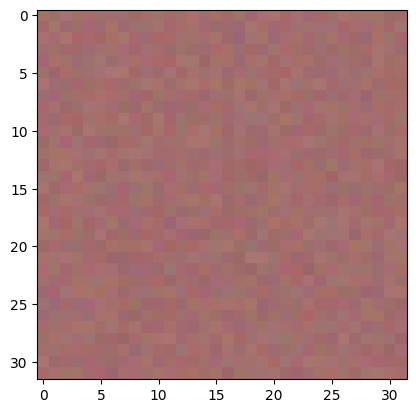

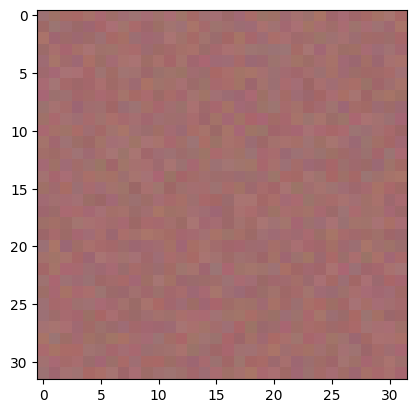

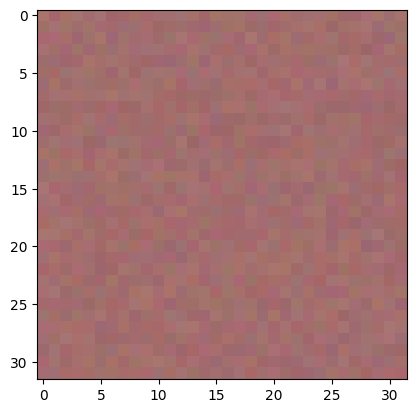

In [43]:
#VISUALIZATION 2: CONVNET FILTERS:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    x += 0.5
    x = np.clip(x , 0 , 1)

    return x


# Define a function to generate patterns for specific layers
def generate_pattern(layer_name, filter_index, size=32):
    input_img_data = tf.Variable(np.random.random((1 , 32 , 32 , 3)) * 20+128.)
    # Compute gradients of the loss with respect to the model's input
    with tf.GradientTape() as tape:
        tape.watch(input_img_data)
        layer_output = featureExtraction_model.get_layer(layer_name)(input_img_data)
        loss = tf.reduce_mean(layer_output[ : , : , : , filter_index])

    grads = tape.gradient(loss, input_img_data)

    # Normalize the gradients
    grads /= (tf.math.sqrt(tf.math.reduce_mean(tf.math.square(grads))) + 1e-5)
    step = 1.
    for i in range(40):
        input_img_data.assign_add(grads*step)

    img = input_img_data.numpy()[0]
    return deprocess_image(img)

plt.imshow(generate_pattern('conv1_relu' , 0))
plt.axis()
plt.show()


plt.imshow(generate_pattern('conv3_block4_out' , 0))
plt.axis()
plt.show()


plt.imshow(generate_pattern('conv5_block3_out' , 0))
plt.axis()
plt.show()

1/1 [==============================] - 1s 703ms/step


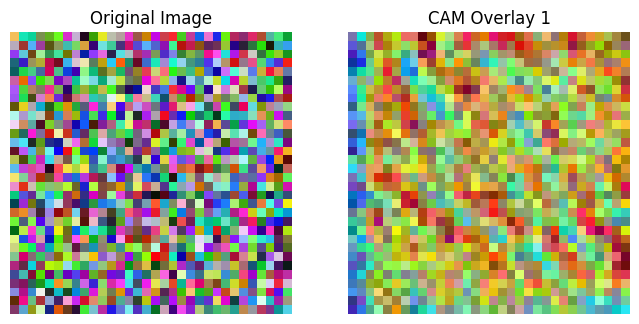

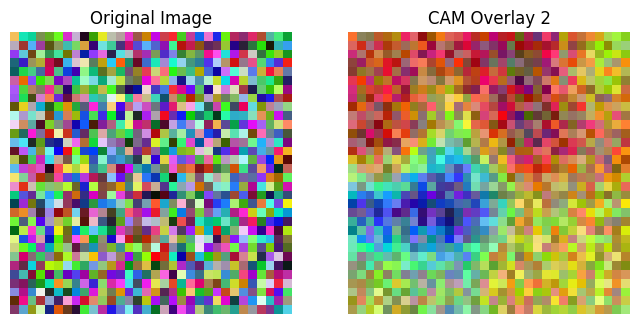

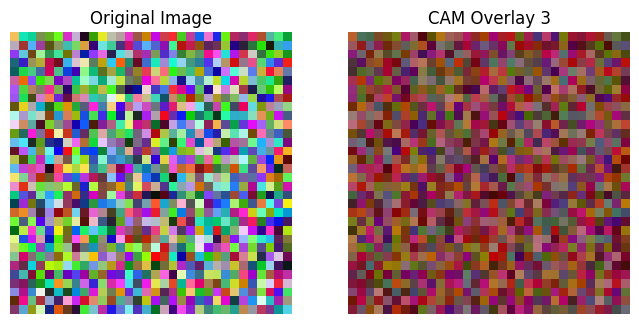

In [44]:
# Access a specific layer by name
desired_layer1 = featureExtraction_model.get_layer('conv1_relu')
desired_layer2 = featureExtraction_model.get_layer('conv3_block4_out')
desired_layer3 = featureExtraction_model.get_layer('conv5_block3_out')

# Create a sub-model that outputs the feature maps of the desired layer
sub_model1 = Model(inputs=featureExtraction_model.input, outputs=desired_layer1.output)
sub_model2 = Model(inputs=featureExtraction_model.input, outputs=desired_layer2.output)
sub_model3 = Model(inputs=featureExtraction_model.input, outputs=desired_layer3.output)

# Define a placeholder tensor of the appropriate size
placeholder_img = np.random.random((1, 32 , 32 , 3))

# Generate class activation maps (CAM) for the desired layers
activation_map1 = sub_model1.predict(placeholder_img)
activation_map1_resized = cv2.resize(activation_map1[0, :, :, 0], (224, 224))

activation_map2 = sub_model2.predict(placeholder_img)
activation_map2_resized = cv2.resize(activation_map2[0, :, :, 0], (224, 224))

activation_map3 = sub_model3.predict(placeholder_img)
activation_map3_resized = cv2.resize(activation_map3[0, :, :, 0], (224, 224))

# Function to overlay CAM on the original image
def overlay_cam(image, activation_map, alpha=0.5, cmap='jet'):
    # Resize the CAM to match the original image size
    activation_map = cv2.resize(activation_map, (image.shape[1], image.shape[0]))

    # Normalize the CAM to be between 0 and 1
    activation_map = (activation_map - activation_map.min()) / (activation_map.max() - activation_map.min() + 1e-5)

    # Apply a colormap for visualization
    activation_map = (255 * activation_map).astype(np.uint8)
    heatmap = cv2.applyColorMap(activation_map, cv2.COLORMAP_JET)

    # Overlay the heatmap on the original image
    cam_overlay = cv2.addWeighted(image, 1 - alpha, heatmap, alpha, 0)

    return cam_overlay


original_image = placeholder_img[0] * 255  # Assuming input images are in the range [0, 255]
cam_overlay1 = overlay_cam(original_image.astype(np.uint8), activation_map1_resized, alpha=0.5, cmap='jet')
cam_overlay2 = overlay_cam(original_image.astype(np.uint8), activation_map2_resized, alpha=0.5, cmap='jet')
cam_overlay3 = overlay_cam(original_image.astype(np.uint8), activation_map3_resized, alpha=0.5, cmap='jet')

# Visualize the CAM overlay
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(original_image.astype(np.uint8))
plt.axis('off')
plt.subplot(122)
plt.title("CAM Overlay 1")
plt.imshow(cam_overlay1)
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(original_image.astype(np.uint8))
plt.axis('off')
plt.subplot(122)
plt.title("CAM Overlay 2")
plt.imshow(cam_overlay2)
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(original_image.astype(np.uint8))
plt.axis('off')
plt.subplot(122)
plt.title("CAM Overlay 3")
plt.imshow(cam_overlay3)
plt.axis('off')
plt.show()